# <center>STUDENT AT PARYS SACLAY 25 OCTOBER 2020</center>#
# <center> Programming Project Document Similarity</center>#
#  NAMES: PANONGBENE JEAN MOHAMED SAWADOGO #
# Email: amet1900@gmail.com #
# Github: https://github.com/Panongbene #

In [48]:
import nltk
import numpy as np
import pandas as pd
from copy import deepcopy
from random import shuffle
from datetime import datetime
import matplotlib.pyplot as plt

# define extra parameter

In [38]:
# use this variable for the tokenize the text
tokenizer = nltk.RegexpTokenizer(r'\w+')

# name File Text
name_file_text = "tweets.txt"

# the threshold value
threshold_simmilarity = 0.05

# the number of permutation function
number_hash_function = 10

# the number of bande 
number_of_bande = 5

# the size of shingle
size_shingle = 5

%matplotlib inline

# load data

In [3]:
# the list containing each line of the doc
array_data = list()

# open the file and build the list
file1 = open(name_file_text,"r")
for i in file1.readlines():
    array_data.append(i.split("\r\n")[0])
file1.close() 

# creation of a dataframe containing the text
data_frame_text_1 = pd.DataFrame(data=array_data, columns=['Text_line'])

# compute the execution time

In [33]:
#https://www.kaggle.com/tilii7/hyperparameter-grid-search-with-xgboost
def timer(start_time=None):
    """This function compute the execution time of algorithm"""
    
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        #print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

    return thour, tmin, round(tsec, 2)


# Define the Jaccard similarity

In [4]:
def jaccard_similarity(text_1, text_2):
    """This function take two list of word and return the jaccard similarity"""
    
    text_1_inter_text_2 = 0
    
    for i in text_1:
        if i in text_2:
            text_1_inter_text_2+=1
            
    return float(text_1_inter_text_2)/float(len(text_1)+len(text_2)-text_1_inter_text_2)

# Define the other version of Jaccard similarity

In [5]:
def jaccard_similarity_(kkkk, s1,s2):
    """Another version of jaccard similarity"""
    
    valeur = 0
    
    for kj in range(len(kkkk)):
        if(kkkk[kj][s1] == kkkk[kj][s2]):
            valeur+=1
    
    return valeur

# Preprocessing data

In [6]:
def preprocessing_doc(array_data):
    """We use this function for build a dictionary where the keys is the ids of document and the values is the 
    texts"""
    
    # define a dictionnary that the function will return 
    dictionnary_doc_1 = dict()
    
    #tokekenize the doc
    for i in range(len(array_data)):
        array_text_tokenize = tokenizer.tokenize(array_data[i].lower())
        text = ""
        for k in array_text_tokenize:
            text+=k
        
        dictionnary_doc_1[i]=text
        
    return dictionnary_doc_1

# Define the k shingling function

In [7]:
def k_shingling_caractere(dictionnary_doc, size_k):
    """This function take a dictionary where the keys are the ids of docs and the values 
    are the texts containing the essential words of the document. The second parameter is
    the length of shingling"""
    
    shingling = dict()
    
    key = 0
    for i in dictionnary_doc:
        kkkk = list()
        text = dictionnary_doc[i]
        
        if(len(text)>=size_k):
            j = 0;
            
            while(j+size_k < len(text)):
                kkk = ""
                for k in range(j, j+size_k):
                    kkk+=text[k]
                j+=1
                kkkk.append(kkk)
            
            kkk = ""
            for k in range(j, len(text)):
                kkk+=text[k]
            kkkk.append(kkk)
            
            shingling[key]=kkkk
            key+=1
        else:
            kkk = ""
            for k in range(len(text)):
                kkk+=text[k]
            kkkk.append(kkk)
            shingling[key]=kkkk
            key+=1
            
    
    # the dictionnary will contain all different k-shingle
    shingle_hash = list()
    
    # building the shingle_hash
    k = 0
    for i in shingling:
        for j in shingling[i]:
            if j not in shingle_hash:
                shingle_hash.append(j)
            
    return shingling, shingle_hash

# Build the min hashing matrix

In [8]:
def build_min_hashing_matrix(dictionnary_doc, shingle_hash, permutation_functions):
    """this function is used to build the signature matrix"""
    
    signature_matrix = dict()
 
    for k in range(len(permutation_functions)):
        value_row = list()

        #--------------------------------------------
        for i in dictionnary_doc:
            for j in permutation_functions[k]:
                if(j in dictionnary_doc[i]):
                    value_row.append(j)
                    break
        #--------------------------------------------            
        
        signature_matrix[k] = value_row
        
    return signature_matrix

# Build the similarity matrix

In [79]:
def build_similarity_matrix(signature_matrix):
    """This function take minhashing matrix and return the signature matrix"""
    
    similarity_matrix = dict()
    
    
    for i in range(len(signature_matrix[0])-1):
        
        array_tampon = list()
        
        for j in range(len(signature_matrix[0])):
            array_tampon.append(jaccard_similarity_(signature_matrix, i,j)/number_hash_function)
        
        similarity_matrix[i]=array_tampon
            
    
    return similarity_matrix

# hash bande function

In [10]:
def hash_bande(bande,hashage_function):
    """We use this function to hash a band"""
    
    hash_bande = list()
    
    for i in range(len(bande[0])):
        array_test = list()
        for j in range(len(bande)):
            array_test.append(bande[j][i])
        
        for k in hashage_function:
            if k in array_test:
                hash_bande.append(k)
                break
                
    return hash_bande

# Build the locality sensitive function

In [11]:
def locality_sensitive_hashing(signature_matrix,number_of_bande,shingle_hash):
    """This function constructs the function of Locality sensitive hashing"""
    
    bande_bucket = dict()
    size_bande = 0
        
    locality_sensitive_hashing_matrix = dict()
    
    # we create number_of_bande of permutation function
    hashage_function = dict()
    for i in range(number_of_bande):
        hashage_function[i] = deepcopy(shingle_hash)
        shuffle(hashage_function[i])     
    
    # it is necessary to choose a number_of_bande that divide the number of row of signature_matrix
    if(len(signature_matrix) % number_of_bande != 0):
        print(" number of bande is not a multiple of number of row signature matrix")
        return bande_bucket
    else:
        size_bande = len(signature_matrix)//number_of_bande
        

    for k in range(number_of_bande):
        
        bande_k = dict()
        
        for kj in range(size_bande):
            bande_k[kj] = signature_matrix[k*size_bande+kj]
        
        bande_bucket[k] = hash_bande(bande_k,hashage_function[k])
        
        
        
    for i in range(len(bande_bucket[0])):
        array_test = list()
        for j in range(len(bande_bucket[0])):
            kkp = 0
            for z in range(number_of_bande):
                if(bande_bucket[z][i] == bande_bucket[z][j]):
                    kkp+=1

            array_test.append(kkp/number_of_bande)
        
        locality_sensitive_hashing_matrix[i] = array_test
        
    return locality_sensitive_hashing_matrix

# Implementation tests

In [12]:
#dictionnary_doc = preprocessing_document(array_data)
dictionnary_doc_1 = preprocessing_doc(array_data)

In [ ]:
for i in dictionnary_doc_1:
    print("id doc = ",i,"  doc = ",dictionnary_doc_1[i])

In [13]:
# creation of k-shingling
k_shingling_carac, shingle_hash = k_shingling_caractere(dictionnary_doc_1, size_shingle)

In [64]:
sike_k_shingling = [i for i in range(100)]
execution_time = list()
number_of_k_shingle_different = list()
for i in sike_k_shingling:
    
    start_time = timer(None)
    k_shingling_carac, shingle_hash = k_shingling_caractere(dictionnary_doc_1, i+1)
    
    thour, tmin, tsec = timer(start_time)
    execution_time.append(thour*3600+tmin*60 + tsec)
    number_of_k_shingle_different.append(len(shingle_hash))

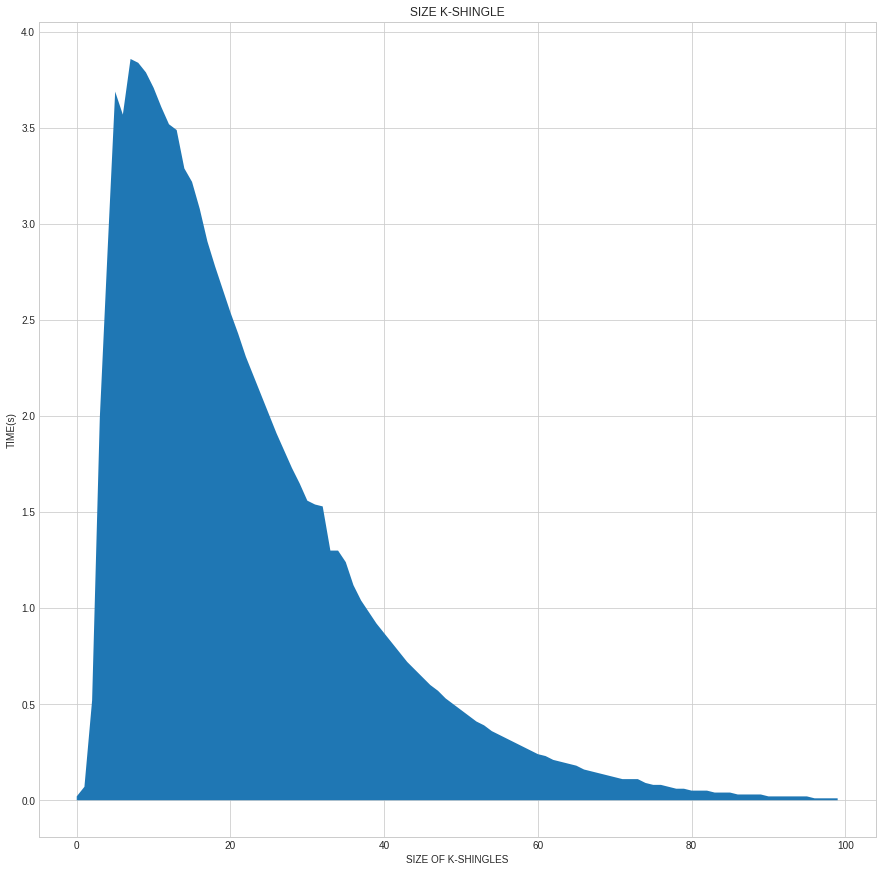

In [65]:
plt.figure(figsize=(15,15))
# Area plot
plt.xlabel('SIZE OF K-SHINGLES')
plt.ylabel('TIME(s)')
plt.title('SIZE K-SHINGLE')
plt.fill_between(sike_k_shingling, execution_time)
plt.savefig('execution_time.png')
plt.show()

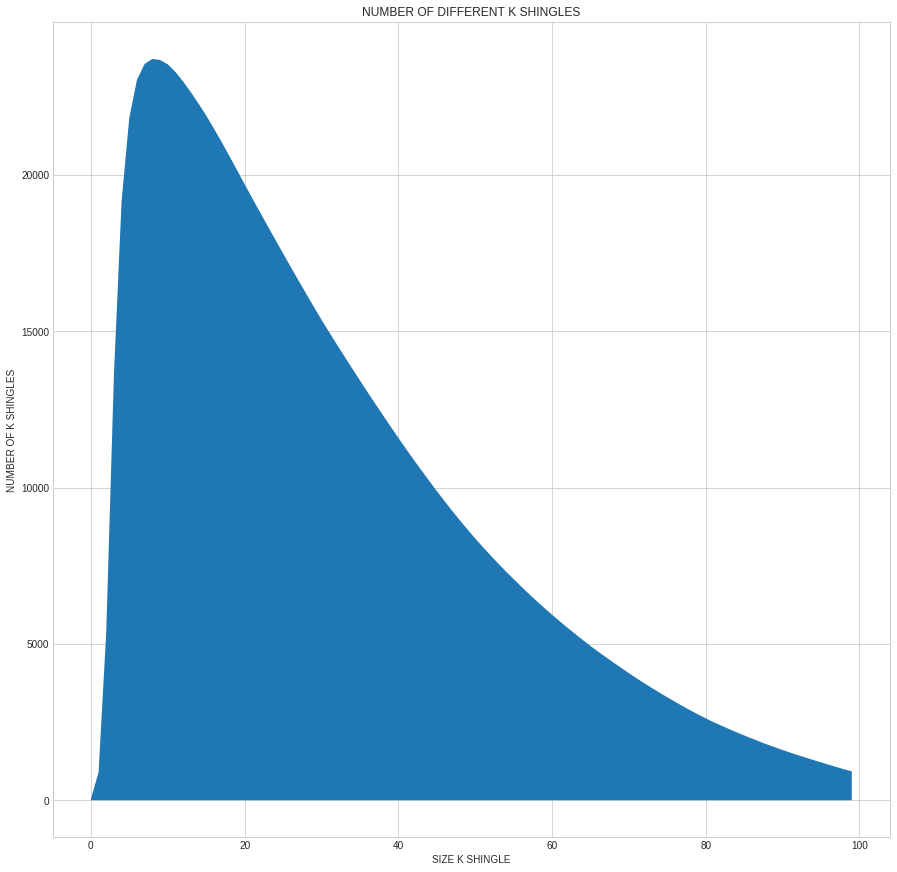

In [66]:
plt.figure(figsize=(15,15))
# Area plot
plt.xlabel('SIZE K SHINGLE')
plt.ylabel('NUMBER OF K SHINGLES')
plt.title('NUMBER OF DIFFERENT K SHINGLES')
plt.fill_between(sike_k_shingling, number_of_k_shingle_different)
plt.savefig('number_of_k_shingle_different.png')
plt.show()

In [67]:
# creation of k-shingling
k_shingling_carac, shingle_hash = k_shingling_caractere(dictionnary_doc_1, size_shingle)

In [68]:
# we create number_perm of permutation function
permutation_functions = dict()
for i in range(number_hash_function):
    permutation_functions[i] = deepcopy(shingle_hash)
    shuffle(permutation_functions[i]) 

In [69]:
# build the mini hashing matrix
signature_matrix = build_min_hashing_matrix(k_shingling_carac, shingle_hash, permutation_functions)

In [74]:
for i in signature_matrix:
    print("id hash function = ",i,"  resul = ",signature_matrix[i][0:9])

id hash function =  0   resul =  ['sfant', 'child', 'sment', 'admin', 'ndith', 'ekind', 'kthis', 'query', 'twitt']
id hash function =  1   resul =  ['itsow', 'echil', 'fthek', 'erloo', 'indle', 'witht', 'angiv', 'ismyn', 'itter']
id hash function =  2   resul =  ['dxisc', 'echil', 'itfuc', 'le2iv', 'mikef', 'imqui', 'enass', 'eryis', 'stwit']
id hash function =  3   resul =  ['le2no', 'sisgo', 'mento', 'thsan', 'nkits', 'rnoit', 'myiha', 'ynewb', 'estwi']
id hash function =  4   resul =  ['ykind', 'ykind', 'esmen', 'oneis', 'ireno', 'mquit', 'econo', 'mynew', 'estwi']
id hash function =  5   resul =  ['edxis', 'oodre', 'theki', 'kenbu', 'havet', 'chard', 'nonlo', 'ueryi', 'itter']
id hash function =  6   resul =  ['eeemy', 'dsisg', 'tasse', 'kthen', 'ghbut', 'stoob', 'andth', 'mynew', 'estwi']
id hash function =  7   resul =  ['largi', 'goodr', 'irsta', 'edbac', 'hekin', 'hekin', 'iseco', 'ewbes', 'twitt']
id hash function =  8   resul =  ['utthe', 'ndle2', 'ndle2', 'ndle2', 'ndle2', '

In [108]:
#Build the similarity matrix
testest = build_similarity_matrix(signature_matrix)

In [109]:
array_similarity_ = list()
similarity_threshold = [0.01*(i+1) for i in range(100)]

In [110]:
#number_hash_function = 10  and  size_shingle = 5
for kk in similarity_threshold:
    numb_similarity = 0
    for i in range(len(testest[0])-1):
        for j in range(i+1,len(testest[0])):
            if testest[i][j]>kk:
                numb_similarity+=1
    array_similarity_.append(numb_similarity)

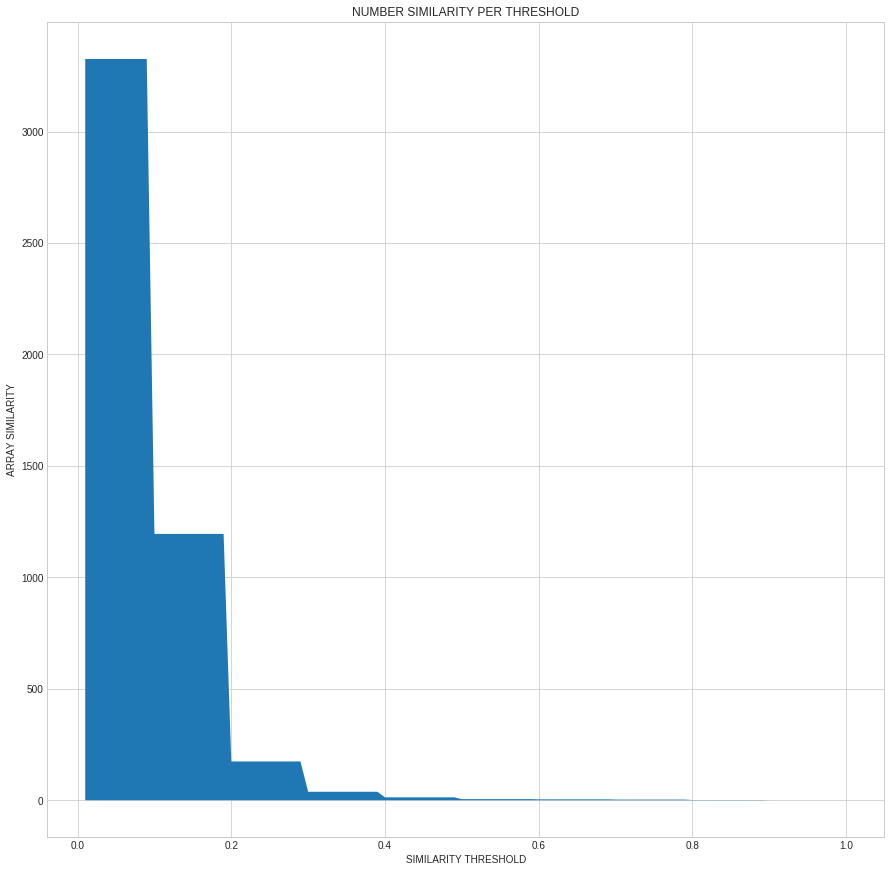

In [112]:
plt.figure(figsize=(15,15))
# Area plot
plt.xlabel('SIMILARITY THRESHOLD')
plt.ylabel('ARRAY SIMILARITY')
plt.title('NUMBER SIMILARITY PER THRESHOLD')
plt.fill_between(similarity_threshold, array_similarity_)
plt.savefig('number_of_similarity_per_threshold.png')
plt.show()

In [96]:
#Build the locality sensistive hashing matrix
locality_sensitive_hashing_matrix = locality_sensitive_hashing(signature_matrix,number_of_bande,shingle_hash)

In [97]:
#-------------------------------------------------------------------------------------------------------------#
#-------------------------------------------------------------------------------------------------------------#

In [98]:
array_similarity_ = list()
array__number_locality_sensitive_ = list()
similarity_threshold = [0.01*(i+1) for i in range(100)]

In [99]:
#number_hash_function = 10  and  size_shingle = 5
for kk in similarity_threshold:
    numb_similarity = 0
    number_loclity = 0
    for i in range(len(testest[0])-1):
        for j in range(i+1,len(testest[0])):
            if testest[i][j]>kk:
                numb_similarity+=1
            if(locality_sensitive_hashing_matrix[i][j]>kk):
                number_loclity+=1
                
    array__number_locality_sensitive_.append(number_loclity)
    array_similarity_.append(numb_similarity/len(array_data))

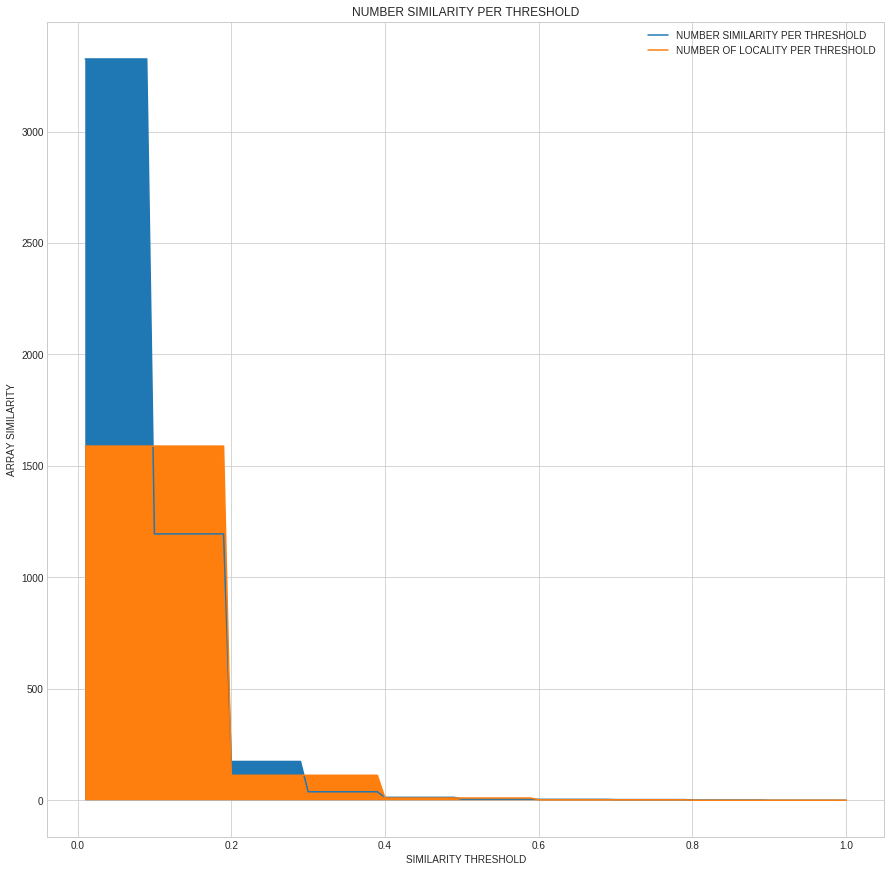

In [127]:
fig = plt.figure(figsize=(15,15))
# Area plot
plt.xlabel('SIMILARITY THRESHOLD')
plt.ylabel('ARRAY SIMILARITY')
plt.title('NUMBER SIMILARITY PER THRESHOLD')
plt.plot(similarity_threshold, array_similarity_, label='NUMBER SIMILARITY PER THRESHOLD')
plt.plot(similarity_threshold, array__number_locality_sensitive_, label='NUMBER OF LOCALITY PER THRESHOLD')
plt.fill_between(similarity_threshold, array_similarity_)
plt.fill_between(similarity_threshold, array__number_locality_sensitive_)
plt.savefig('123.png')
plt.legend(loc='best')
plt.show()

In [19]:
# locality sensitive hashing matrix
for i in range(len(locality_sensitive_hashing_matrix[0])-1):
    for j in range(i+1,len(locality_sensitive_hashing_matrix[0])-i):
        if(locality_sensitive_hashing_matrix[i][j]>0):
            print(i,"  ===  ",j,"  ==  ",locality_sensitive_hashing_matrix[i][j])

0   ===   275   ==   0.2
1   ===   23   ==   0.2
1   ===   237   ==   0.6
1   ===   248   ==   0.2
1   ===   284   ==   0.2
1   ===   445   ==   0.2
1   ===   454   ==   0.2
1   ===   468   ==   0.2
4   ===   132   ==   0.2
4   ===   370   ==   0.2
5   ===   14   ==   0.2
5   ===   389   ==   0.2
5   ===   390   ==   0.2
5   ===   434   ==   0.2
6   ===   389   ==   0.2
7   ===   195   ==   0.2
7   ===   348   ==   0.2
8   ===   104   ==   0.2
8   ===   485   ==   0.2
10   ===   12   ==   0.2
10   ===   17   ==   0.2
10   ===   38   ==   0.2
10   ===   55   ==   0.2
10   ===   83   ==   0.2
10   ===   86   ==   0.2
10   ===   88   ==   0.2
10   ===   112   ==   0.2
10   ===   158   ==   0.2
10   ===   198   ==   0.2
10   ===   232   ==   0.2
10   ===   240   ==   0.2
10   ===   262   ==   0.2
10   ===   269   ==   0.2
10   ===   294   ==   0.2
10   ===   310   ==   0.2
10   ===   335   ==   0.2
10   ===   345   ==   0.2
10   ===   482   ==   0.2
12   ===   157   ==   0.2
13   ===   59 

142   ===   148   ==   0.2
142   ===   149   ==   0.2
142   ===   150   ==   0.2
142   ===   151   ==   0.2
142   ===   153   ==   0.2
142   ===   154   ==   0.2
142   ===   211   ==   0.2
142   ===   212   ==   0.2
142   ===   215   ==   0.2
143   ===   144   ==   0.2
143   ===   145   ==   0.2
143   ===   146   ==   0.2
143   ===   148   ==   0.2
143   ===   149   ==   0.2
143   ===   150   ==   0.2
143   ===   151   ==   0.2
143   ===   153   ==   0.2
143   ===   154   ==   0.2
143   ===   211   ==   0.2
143   ===   212   ==   0.2
143   ===   215   ==   0.2
144   ===   145   ==   0.2
144   ===   146   ==   0.2
144   ===   148   ==   0.2
144   ===   149   ==   0.2
144   ===   150   ==   0.2
144   ===   151   ==   0.2
144   ===   153   ==   0.2
144   ===   154   ==   0.2
144   ===   211   ==   0.2
144   ===   212   ==   0.2
144   ===   215   ==   0.2
145   ===   146   ==   0.2
145   ===   148   ==   0.2
145   ===   149   ==   0.2
145   ===   150   ==   0.2
145   ===   151   ==   0.2
1

In [20]:
#number_hash_function = 10  and  size_shingle = 5
for i in range(len(signature_matrix[0])-1):
    for j in range(i+1,len(signature_matrix[0])):
        if jaccard_similarity(k_shingling_carac[i], k_shingling_carac[j])>threshold_simmilarity:
            print(i,"    ",j,"    ",jaccard_similarity(k_shingling_carac[i], k_shingling_carac[j]))

0      238      0.05102040816326531
0      455      0.061068702290076333
1      237      0.125
1      238      0.14285714285714285
1      454      0.07017543859649122
1      455      0.05747126436781609
1      464      0.0847457627118644
1      468      0.05660377358490566
2      4      0.07228915662650602
2      5      0.0759493670886076
2      237      0.057692307692307696
2      238      0.05555555555555555
2      265      0.06722689075630252
2      468      0.05555555555555555
2      469      0.06315789473684211
4      5      0.06521739130434782
4      209      0.05405405405405406
4      265      0.08527131782945736
4      468      0.07692307692307693
4      469      0.05555555555555555
5      469      0.057692307692307696
8      61      0.09375
8      62      0.1875
8      63      0.09375
8      64      0.05172413793103448
8      104      0.06666666666666667
8      105      0.05454545454545454
8      241      0.125
8      242      0.0625
8      300      0.07692307692307693
8      

56      156      0.06289308176100629
56      157      0.06535947712418301
56      193      0.062111801242236024
56      247      0.10204081632653061
56      248      0.06289308176100629
56      274      0.0684931506849315
56      290      0.12941176470588237
56      291      0.1746031746031746
56      292      0.09243697478991597
56      293      0.07534246575342465
56      294      0.13131313131313133
56      295      0.10476190476190476
56      320      0.08
56      324      0.07874015748031496
56      375      0.09345794392523364
56      377      0.06451612903225806
56      401      0.10989010989010989
56      415      0.09345794392523364
56      416      0.06369426751592357
56      424      0.08264462809917356
56      443      0.06535947712418301
56      448      0.07462686567164178
56      492      0.096
57      58      0.16417910447761194
57      290      0.15714285714285714
57      291      0.1981981981981982
57      292      0.10576923076923077
57      293      0.08396946564885

113      468      0.08
115      116      0.0641025641025641
115      117      0.14285714285714285
115      118      0.1111111111111111
115      318      0.05263157894736842
115      353      0.06741573033707865
115      354      0.136986301369863
115      358      0.05194805194805195
116      117      0.06944444444444445
116      118      0.05952380952380952
116      232      0.0707070707070707
117      118      0.125
117      262      0.05063291139240506
117      357      0.05405405405405406
117      358      0.056338028169014086
118      342      0.06779661016949153
118      357      0.058823529411764705
118      443      0.05511811023622047
119      326      0.10714285714285714
119      327      0.06666666666666667
119      477      0.050724637681159424
120      121      0.06993006993006994
120      122      0.07142857142857142
120      123      0.0625
120      350      0.06918238993710692
120      359      0.09174311926605505
121      122      0.09868421052631579
121      123      

136      361      0.1111111111111111
136      362      0.15384615384615385
136      363      0.15584415584415584
136      364      0.08108108108108109
136      365      0.1348314606741573
136      366      0.11538461538461539
136      367      0.09523809523809523
136      368      0.13953488372093023
136      369      0.12612612612612611
136      370      0.10810810810810811
136      371      0.125
136      372      0.12
137      261      0.06179775280898876
141      143      0.05172413793103448
141      144      0.125
141      145      0.06862745098039216
141      146      0.06060606060606061
141      147      0.08695652173913043
141      150      0.09333333333333334
141      151      0.09090909090909091
141      152      0.09649122807017543
141      153      0.102803738317757
141      154      0.12643678160919541
141      211      0.09565217391304348
141      212      0.05660377358490566
141      214      0.06315789473684211
141      387      0.07692307692307693
141      388      0.0

155      156      0.0738255033557047
155      157      0.1
155      193      0.06578947368421052
155      247      0.11235955056179775
155      248      0.08108108108108109
155      274      0.08888888888888889
155      320      0.08620689655172414
155      324      0.0847457627118644
155      375      0.10204081632653061
155      377      0.0684931506849315
155      401      0.13580246913580246
155      415      0.10204081632653061
155      416      0.06756756756756757
155      424      0.0990990990990991
155      443      0.06944444444444445
155      448      0.08
155      492      0.0847457627118644
156      157      0.05583756345177665
156      247      0.06993006993006994
156      274      0.05235602094240838
156      320      0.058823529411764705
156      324      0.07058823529411765
156      375      0.08
156      377      0.08808290155440414
156      401      0.08148148148148149
156      415      0.0728476821192053
156      424      0.060240963855421686
156      443      0.0558

186      300      0.05747126436781609
186      311      0.05813953488372093
186      328      0.05154639175257732
186      335      0.052083333333333336
186      345      0.05263157894736842
186      346      0.05319148936170213
186      399      0.058823529411764705
186      411      0.05154639175257732
186      414      0.08928571428571429
186      423      0.054945054945054944
186      429      0.06363636363636363
186      446      0.05263157894736842
186      482      0.06593406593406594
187      188      0.07142857142857142
187      189      0.12121212121212122
187      190      0.08
187      254      0.07272727272727272
187      322      0.052083333333333336
187      363      0.08888888888888889
187      426      0.10227272727272728
187      428      0.05405405405405406
187      430      0.06382978723404255
187      431      0.06666666666666667
188      189      0.08695652173913043
188      190      0.15384615384615385
188      427      0.06451612903225806
188      428      0.08


241      485      0.05084745762711865
242      303      0.05660377358490566
243      249      0.06993006993006994
244      245      0.6842105263157895
244      248      0.064
245      248      0.058394160583941604
246      249      0.0703125
246      266      0.06837606837606838
246      269      0.052083333333333336
246      280      0.06756756756756757
246      282      0.06172839506172839
246      287      0.07058823529411765
246      294      0.05434782608695652
246      300      0.06578947368421052
246      311      0.06666666666666667
246      328      0.05813953488372093
246      335      0.07142857142857142
246      345      0.05952380952380952
246      346      0.060240963855421686
246      351      0.05555555555555555
246      399      0.05434782608695652
246      411      0.07058823529411765
246      423      0.0625
246      482      0.06172839506172839
247      248      0.10071942446043165
247      274      0.08527131782945736
247      320      0.09174311926605505
247      

324      375      0.08333333333333333
324      377      0.05952380952380952
324      401      0.09615384615384616
324      415      0.08333333333333333
324      416      0.058823529411764705
324      424      0.07462686567164178
324      443      0.060240963855421686
324      448      0.06802721088435375
324      492      0.07142857142857142
325      328      0.05102040816326531
325      335      0.0625
325      345      0.052083333333333336
325      346      0.05263157894736842
325      411      0.05102040816326531
325      423      0.06593406593406594
325      429      0.05357142857142857
325      482      0.07692307692307693
326      327      0.14285714285714285
328      330      0.08955223880597014
328      335      0.06097560975609756
328      345      0.10256410256410256
328      346      0.0759493670886076
328      351      0.06976744186046512
328      399      0.056179775280898875
328      411      0.060240963855421686
328      423      0.06493506493506493
328      429      0.0

424      443      0.0625
424      448      0.07092198581560284
424      492      0.07462686567164178
429      482      0.053763440860215055
440      441      0.0743801652892562
442      446      0.0718954248366013
443      448      0.057803468208092484
443      492      0.06666666666666667
446      482      0.06315789473684211
447      448      0.07096774193548387
447      449      0.07518796992481203
447      450      0.06896551724137931
448      449      0.06015037593984962
448      450      0.0625
448      492      0.06802721088435375
449      450      0.06557377049180328
453      469      0.055900621118012424
454      455      0.06870229007633588
455      464      0.06493506493506493
456      458      0.07042253521126761
464      466      0.05263157894736842
464      468      0.06976744186046512
474      475      0.1111111111111111
474      476      0.054945054945054944
474      487      0.07692307692307693
474      488      0.07633587786259542
475      477      0.18705035971223022